# Programming Project 1 analysis using EDA tools

### Import Modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the dataset and save it to a dataframe named 'df'
df = pd.read_csv('SemesterTimesheet.csv')

### Investigate your dataset using pandas modules and do the tasks. At the end the dataframe will be look like: 
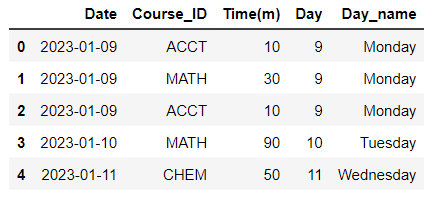

In [10]:
df.head()

,initials,date,Unnamed: 2,time(m),summary
0,BG,1/9/23,PSYC-214-02,20,finished assignment 1
1,BG,1/14/23,IDC-401-ON,20,Finished discussion board
2,BG,1/15/23,GEOG-175-ON,45,Finished Discussion board and quiz
3,BG,1/17/23,CS-450-01,60,brainstormed ideas for capstone
4,BG,1/18/23,CS-450-01,90,worked on capstone proposal


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   initials    19 non-null     object
 1   date        19 non-null     object
 2   Unnamed: 2  19 non-null     object
 3   time(m)     19 non-null     int64 
 4   summary     19 non-null     object
dtypes: int64(1), object(4)
memory usage: 888.0+ bytes


In [12]:
df = df.rename(columns={'Unnamed: 2': 'Course_ID', 'time(m)': 'Time(m)', 'date': 'Date'})

In [13]:
df.head()

,initials,Date,Course_ID,Time(m),summary
0,BG,1/9/23,PSYC-214-02,20,finished assignment 1
1,BG,1/14/23,IDC-401-ON,20,Finished discussion board
2,BG,1/15/23,GEOG-175-ON,45,Finished Discussion board and quiz
3,BG,1/17/23,CS-450-01,60,brainstormed ideas for capstone
4,BG,1/18/23,CS-450-01,90,worked on capstone proposal


In [14]:
# Is there any column you want to drop? If yes which column and why?
# Yes we can drop initials because it is irrelevant and the same for each column
# We can also drop summary as there is no real way to track or explore that column

df.drop('initials', axis=1, inplace=True)
df.drop('summary', axis=1, inplace=True)
df.head()

,Date,Course_ID,Time(m)
0,1/9/23,PSYC-214-02,20
1,1/14/23,IDC-401-ON,20
2,1/15/23,GEOG-175-ON,45
3,1/17/23,CS-450-01,60
4,1/18/23,CS-450-01,90


In [23]:
# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Course_ID,Time(m)
0,2023-01-09,PSYC-214-02,20
1,2023-01-14,IDC-401-ON,20
2,2023-01-15,GEOG-175-ON,45
3,2023-01-17,CS-450-01,60
4,2023-01-18,CS-450-01,90


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19 non-null     datetime64[ns]
 1   Course_ID  19 non-null     object        
 2   Time(m)    19 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 584.0+ bytes


In [25]:
# Calculate the day of the month and create a new column named 'Day'
df['Day'] = df['Date'].dt.day
df.head()


,Date,Course_ID,Time(m),Day
0,2023-01-09,PSYC-214-02,20,9
1,2023-01-14,IDC-401-ON,20,14
2,2023-01-15,GEOG-175-ON,45,15
3,2023-01-17,CS-450-01,60,17
4,2023-01-18,CS-450-01,90,18


In [27]:
# Create a new column called Day_name using  .dt.day_name()
df['Day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Course_ID,Time(m),Day,Day_name
0,2023-01-09,PSYC-214-02,20,9,Monday
1,2023-01-14,IDC-401-ON,20,14,Saturday
2,2023-01-15,GEOG-175-ON,45,15,Sunday
3,2023-01-17,CS-450-01,60,17,Tuesday
4,2023-01-18,CS-450-01,90,18,Wednesday


### Answer the questions

In [30]:
# What is the average time you have spend for learning?
average_learning = round(df['Time(m)'].mean(), 2)

print ('On average I spend', average_learning, 'minutes learning')

On average I spend 61.84 minutes learning


In [31]:
# Display all of the entries where you have spent more than the average time to learn 
result = df[df['Time(m)'] > average_learning]

print(result)

         Date    Course_ID  Time(m)  Day   Day_name
4  2023-01-18    CS-450-01       90   18  Wednesday
6  2023-01-22    CS-450-01      120   22     Sunday
8  2023-01-24    CS-450-01      120   24    Tuesday
12 2023-02-04  GEOG-175-ON      120    4   Saturday
15 2023-02-10    CS-450-01      120   10     Friday


In [32]:
# Which course you have spent the maximum time to prepare?
course = df.groupby('Course_ID')['Time(m)'].sum()

max_course = course.idxmax()

print('The course I have spent the most time on is', max_course)

The course I have spent the most time on is CS-450-01


In [35]:
# Which day of the week you sepent most of the time?
day = df.groupby('Day_name')['Time(m)'].sum()

max_day = day.idxmax()

print('The day of the week I have spent the most time on is', max_day)

The day of the week I have spent the most time on is Sunday


### Investigate the distribution of Time, adding the mean. How the data distributed?
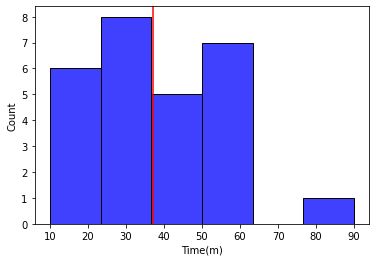

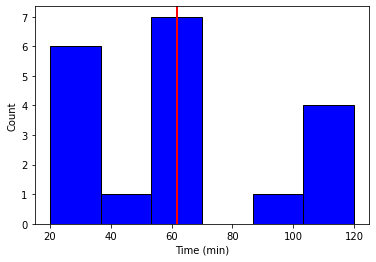

In [41]:
mean_time = df['Time(m)'].mean()

# plot the distribution of time
fig, ax = plt.subplots()
ax.hist(df['Time(m)'], bins=6, edgecolor='black', color='blue')
ax.axvline(mean_time, color='red', linewidth=2)

# add labels and title
ax.set_xlabel('Time (min)')
ax.set_ylabel('Count')

plt.show()

The data seems to be a little right skewed, but it could also be argued that there is no skew

### Investigate Total time by Day using bar plot - Remove the Confidence Interval - By Course ID. Comment on your findings
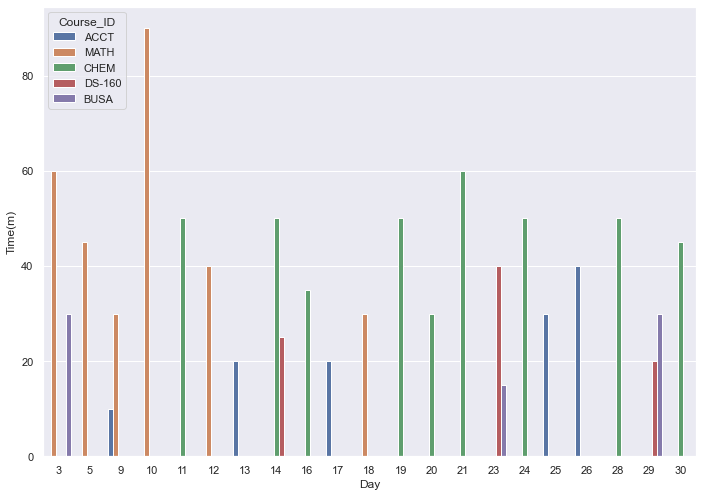

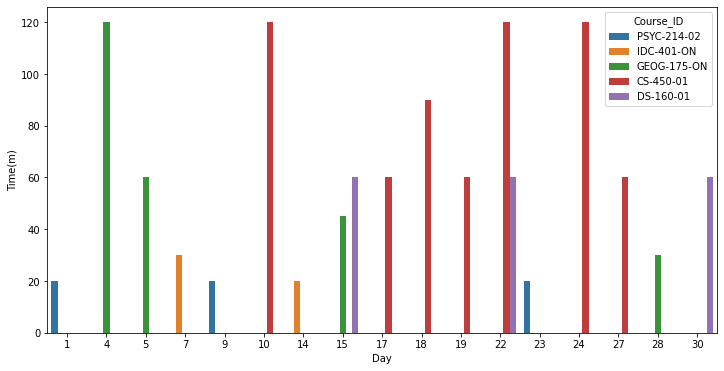

In [43]:
import seaborn as sns

plt.figure(figsize=(12,6))
bar_plot = sns.barplot(x='Day', y='Time(m)', data=df, ci=False, hue='Course_ID')


I definitley spend the most time on my capstone class as I expected. Also it seems that I work a lot more near the end of the month than the beginning. Finally, it seems that I complete all my DS-160-01 projects around the same amount of time.

### Investigate the measure of dispersion (table and plot) of time column.
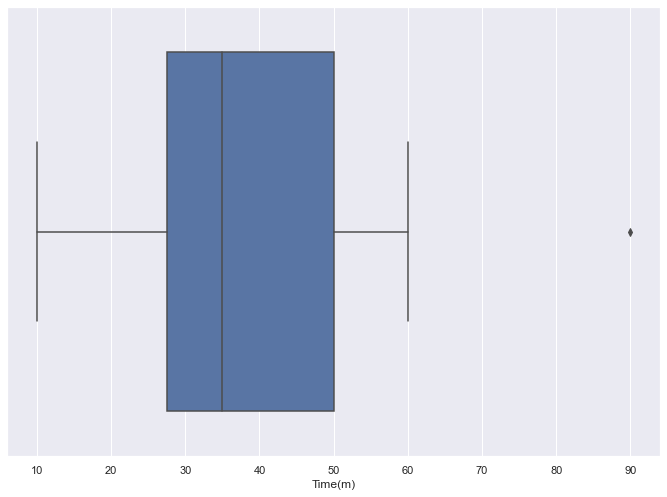

<AxesSubplot:xlabel='Time(m)'>

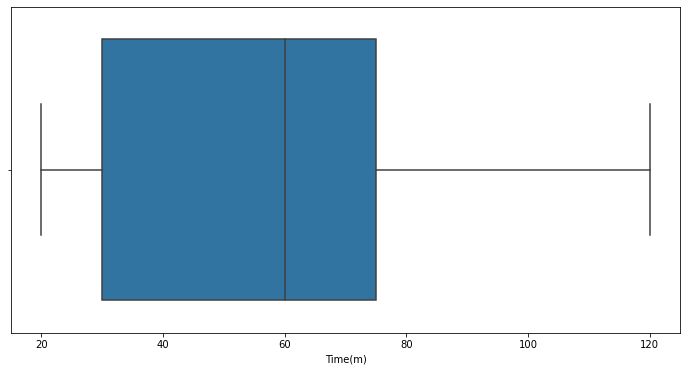

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Time(m)'])


The median time is 60 minutes
For the minumum quartile I spend 20 minutes
For the 25th through 75th percentile i spend 30-75 minutes
For the maximum quartile I spend 120 minutes

### Investigate the the distribution of time by Day_name
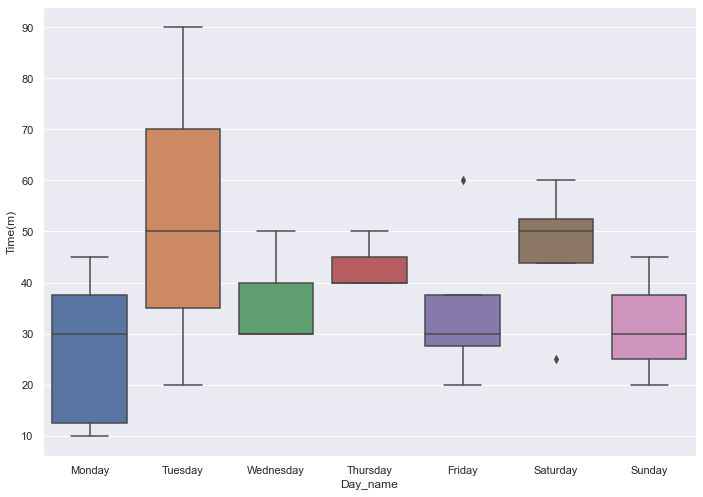

<AxesSubplot:xlabel='Day_name', ylabel='Time(m)'>

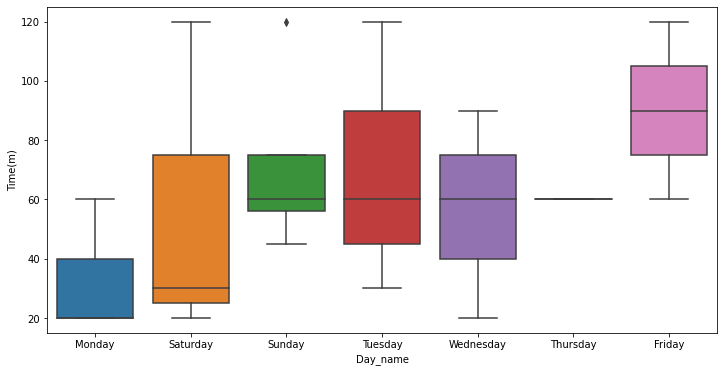

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Day_name'], y=df['Time(m)'], data=df)


My lightest days seem to be Monday and Thursday
Saturday has a big fluctuation on how much I work.

### Use lmplots to plot Day and Time , remove error bar, add hue and display by column
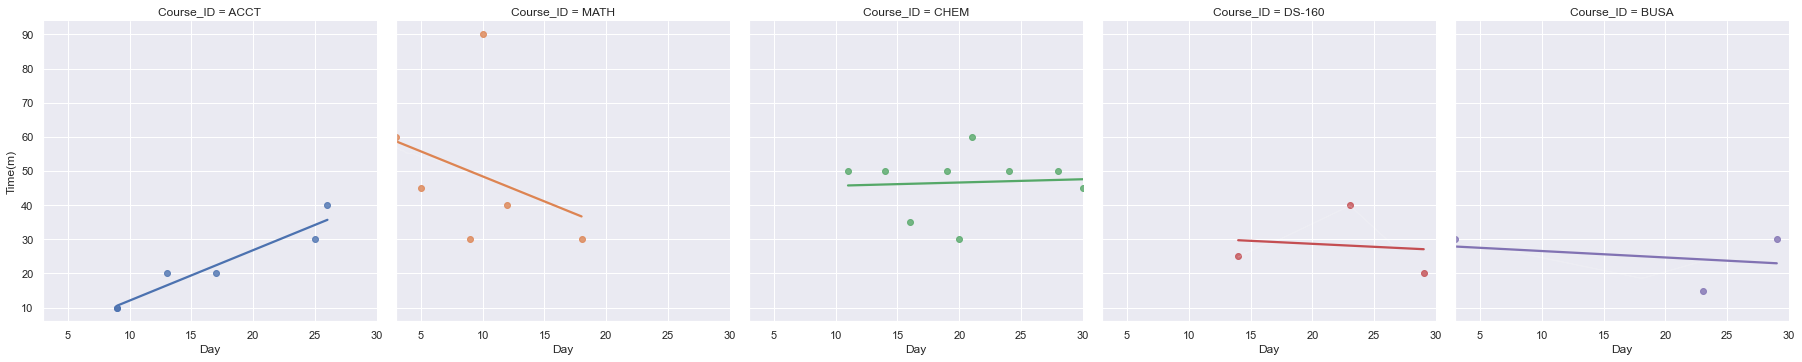

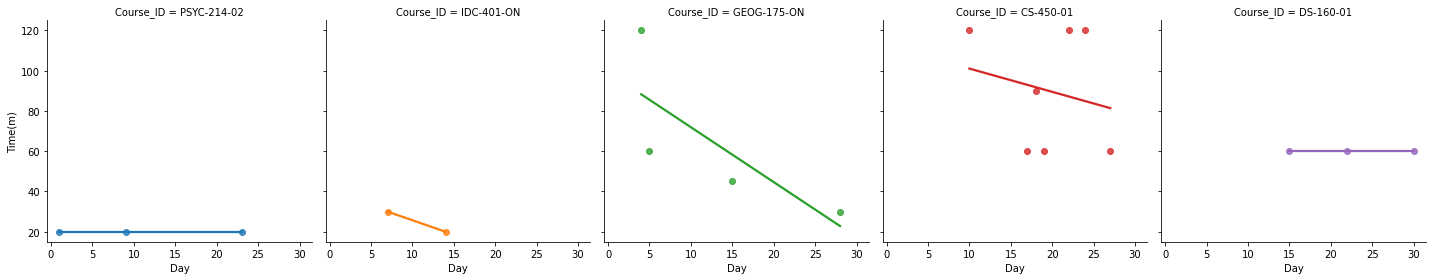

In [50]:
sns.lmplot(x='Day', y='Time(m)', data=df, ci=False, hue='Course_ID', markers='o', col='Course_ID', height=4)


### Create a pair plot of Day and Time and add course id as hue
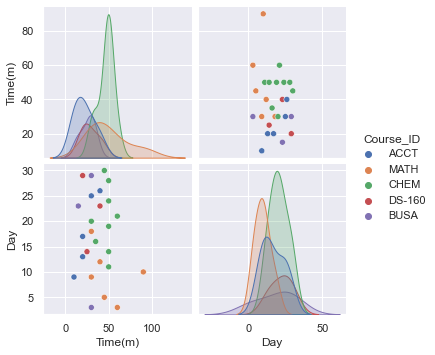

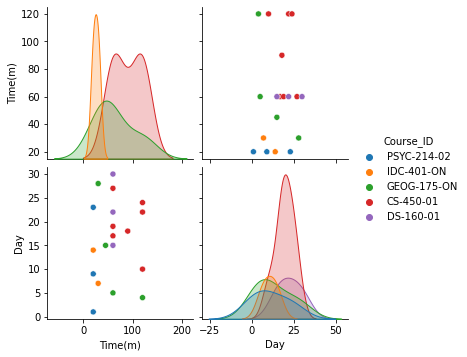

In [53]:
sns.pairplot(df[['Time(m)', 'Day', 'Course_ID']], hue='Course_ID')


### Display the Heatmap and comment on your findings
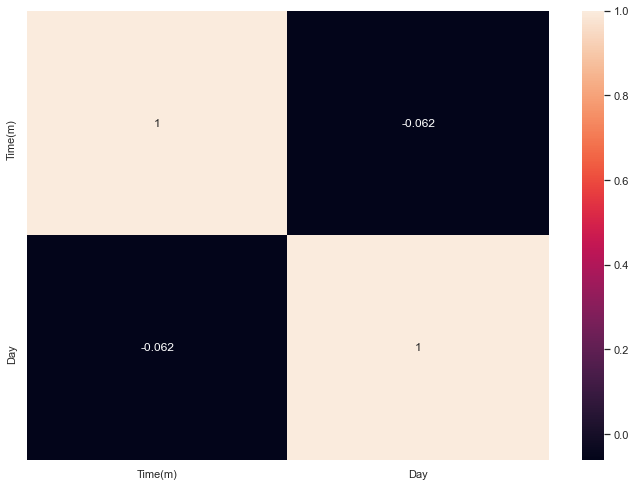

          Time(m)       Day
Time(m)  1.000000  0.074068
Day      0.074068  1.000000


<AxesSubplot:>

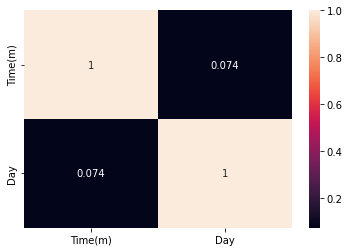

In [54]:
# Example 1 - Heatmap for PC
correlation = df[['Time(m)', 'Day']].corr(method='pearson')
print(correlation)

cols=['Time(m)', 'Day']

sns.heatmap(correlation, annot=True, xticklabels=cols, yticklabels=cols)

Time(m) and Day are very lowly correlated. I believe this is just due to this being such a small dataset. I think that if I were to take this data over the course of a year or semester that I would defintely find correlation between how much time i spend on certain days.